In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-02-01 11:19:53.714756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 11:19:54.740173: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/francesco/Downloads/cuda/lib64:/usr/local/cuda-11.2/lib64
2023-02-01 11:19:54.740252: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/francesco/Downloads/cuda/lib64:/usr/local/cuda-11.2/lib64
20

### Load CIFAR10 dataset and print shapes of X and Y for training and testing

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### Print the unique labels

In [3]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


### Visualize one image and the label from the dataset

[3]


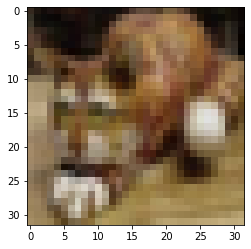

In [4]:
index = 1010
plt.imshow(X_train[index])
print(Y_train[index])

### Normalize the data

In [5]:
print(X_train.max(), X_train.min())

X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
1.0 0.0
1.0 0.0


### Create CNN model architecture using sequential

In [6]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=None, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation=None, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation=None, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=None),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        1

2023-02-01 11:19:58.924960: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 11:19:58.931135: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 11:19:58.931498: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 11:19:58.932188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

### Choose Optimizer, Loss function and Metrics for monitoring

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

### Start training

In [8]:
history = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

2023-02-01 11:20:00.314328: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-02-01 11:20:00.778788: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50


2023-02-01 11:20:02.435798: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-01 11:20:03.201892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-01 11:20:04.482474: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f4be0014f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-01 11:20:04.482510: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-02-01 11:20:04.488595: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-01 11:20:04.681897: I tensorflow/compiler/jit/xla_compilation_cache.cc:4

1563/1563 [==============================] - 16s 7ms/step - loss: 1.7469 - sparse_categorical_accuracy: 0.3449 - val_loss: 1.6663 - val_sparse_categorical_accuracy: 0.3960
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4534 - sparse_categorical_accuracy: 0.4521 - val_loss: 1.1956 - val_sparse_categorical_accuracy: 0.5814
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3460 - sparse_categorical_accuracy: 0.4954 - val_loss: 1.0944 - val_sparse_categorical_accuracy: 0.6209
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2617 - sparse_categorical_accuracy: 0.5297 - val_loss: 1.1505 - val_sparse_categorical_accuracy: 0.6069
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2029 - sparse_categorical_accuracy: 0.5534 - val_loss: 1.1760 - val_sparse_categorical_accuracy: 0.5638
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1611 - sparse_cat

Epoch 46/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5315 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.6586 - val_sparse_categorical_accuracy: 0.7902
Epoch 47/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5374 - sparse_categorical_accuracy: 0.8126 - val_loss: 0.7975 - val_sparse_categorical_accuracy: 0.7507
Epoch 48/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5201 - sparse_categorical_accuracy: 0.8185 - val_loss: 0.6413 - val_sparse_categorical_accuracy: 0.8016
Epoch 49/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5164 - sparse_categorical_accuracy: 0.8193 - val_loss: 0.6191 - val_sparse_categorical_accuracy: 0.8041
Epoch 50/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5166 - sparse_categorical_accuracy: 0.8207 - val_loss: 0.7618 - val_sparse_categorical_accuracy: 0.7724


### Check loss and accuracy of training and test set during training

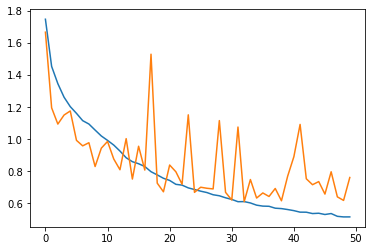

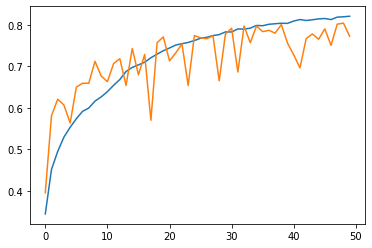

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.show()

1/1 [==============================] - 0s 209ms/step
[[1.9198750e-01 2.8582435e-06 2.5748116e-01 1.2678906e-02 9.9503456e+01
  4.0120063e-03 2.6712945e-02 1.9664112e-03 1.6086954e-03 1.0155028e-04]]
0.9950346
4
[4]


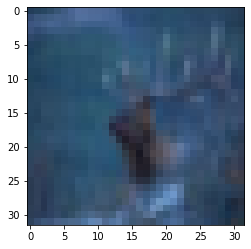

In [10]:
# Run prediction for an image
index = 22
probabilities = model.predict(np.expand_dims(X_test[index], 0))
print(100*probabilities)
print(np.max(probabilities))
print(np.argmax(probabilities))
print(Y_test[index])
plt.imshow(X_test[index])